In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the custom separators
separator = '\x09'
set_separator = ','

# Specify the path to the dataset file
dataset_file = "data/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-21-1/bro/conn.log.labeled"

df = pd.read_csv(dataset_file, sep='\x09', header=None, comment='#')




In [3]:
last_three_columns = df[20]
benign_value = last_three_columns[0]

# make this series into three different columns. The first element is a column, the second element is a column, and the third element is a column
last_three_columns = last_three_columns.str.split("   ", expand=True)
last_three_columns

# now, integrate the three columns into the original dataframe
df[20] = last_three_columns[0]
df[21] = last_three_columns[1]
df[22] = last_three_columns[2]

In [4]:
# rename the columns
with open(dataset_file, 'r') as f:
    # initiate the for loop
    for line in f:
        if line.startswith('#fields'):
            fields = line.strip()[8:].split(separator)
            fields = [field.strip() for field in fields]
            print(fields)
            df.columns = fields
        elif line.startswith('#'):
            continue
        else:
            break



['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']


In [5]:
# map the target labels to 0
df['label'] = df['label'].map({"Benign": 0, "Malicious": 1})

# drop nan values
df.dropna(inplace=True)

In [6]:
# create a new dataframe with only the useful columns
df_reduced = df[['id.orig_h', 'id.resp_h', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']]

In [7]:
# convert the duration column to float
df_reduced["duration"] = df_reduced["duration"].map(lambda x: float(x) if x != "-" else 0.0)

/tmp/ipykernel_20766/713016053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["duration"] = df_reduced["duration"].map(lambda x: float(x) if x != "-" else 0.0)


In [8]:
# remove id.orig_h, local_orig and local_resp because it is the same for all entries
df_reduced.drop(['id.orig_h', "local_orig", "local_resp", "tunnel_parents", "detailed-label"], axis=1, inplace=True)



/tmp/ipykernel_20766/695082480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.drop(['id.orig_h', "local_orig", "local_resp", "tunnel_parents", "detailed-label"], axis=1, inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder
# convert proto and service to categorical columns

encoder_proto = LabelEncoder()
df_reduced["proto"] = encoder_proto.fit_transform(df_reduced["proto"])

encoder_service = LabelEncoder()
df_reduced["service"] = encoder_service.fit_transform(df_reduced["service"])

encoder_conn_state = LabelEncoder()
df_reduced["conn_state"] = encoder_conn_state.fit_transform(df_reduced["conn_state"])

encoder_id = LabelEncoder()
df_reduced["id.resp_h"] = encoder_id.fit_transform(df_reduced["id.resp_h"])

encoder_history = LabelEncoder()
df_reduced["history"] = encoder_history.fit_transform(df_reduced["history"])

# map all "-" to -1
df_reduced = df_reduced.replace("-", -1)


# normalize the appropiate columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_reduced["duration"] = scaler.fit_transform(df_reduced["duration"].values.reshape(-1, 1))
df_reduced["orig_bytes"] = scaler.fit_transform(df_reduced["orig_bytes"].values.reshape(-1, 1))
df_reduced["resp_bytes"] = scaler.fit_transform(df_reduced["resp_bytes"].values.reshape(-1, 1))
df_reduced["missed_bytes"] = scaler.fit_transform(df_reduced["missed_bytes"].values.reshape(-1, 1))
df_reduced["orig_pkts"] = scaler.fit_transform(df_reduced["orig_pkts"].values.reshape(-1, 1))
df_reduced["orig_ip_bytes"] = scaler.fit_transform(df_reduced["orig_ip_bytes"].values.reshape(-1, 1))
df_reduced["resp_pkts"] = scaler.fit_transform(df_reduced["resp_pkts"].values.reshape(-1, 1))
df_reduced["resp_ip_bytes"] = scaler.fit_transform(df_reduced["resp_ip_bytes"].values.reshape(-1, 1))

/tmp/ipykernel_20766/1264075460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["proto"] = encoder_proto.fit_transform(df_reduced["proto"])
/tmp/ipykernel_20766/1264075460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["service"] = encoder_service.fit_transform(df_reduced["service"])
/tmp/ipykernel_20766/1264075460.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [10]:
df_reduced

,id.resp_h,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,8,2,1,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000024,0.000000,0.000000,0
1,8,2,1,4.405857e-08,0.005536,0.005536,5,0.000000,2,0.000147,0.000301,0.000281,0.000484,0
2,8,2,1,1.476031e-04,0.004806,0.000061,2,0.000000,1,0.000147,0.000259,0.000000,0.000000,0
3,8,2,1,4.373417e-08,0.005536,0.005536,5,0.000000,2,0.000147,0.000301,0.000281,0.000484,0
4,8,2,1,1.485908e-04,0.007178,0.008699,5,0.000000,2,0.000294,0.000493,0.000281,0.000656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,16,2,0,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000056,0.000000,0.000000,0
3282,45,2,0,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000056,0.000000,0.000000,0
3283,29,2,0,5.868578e-08,0.002981,0.002981,5,0.000000,2,0.000000,0.000056,0.000140,0.000252,0
3284,38,2,0,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000056,0.000000,0.000000,0


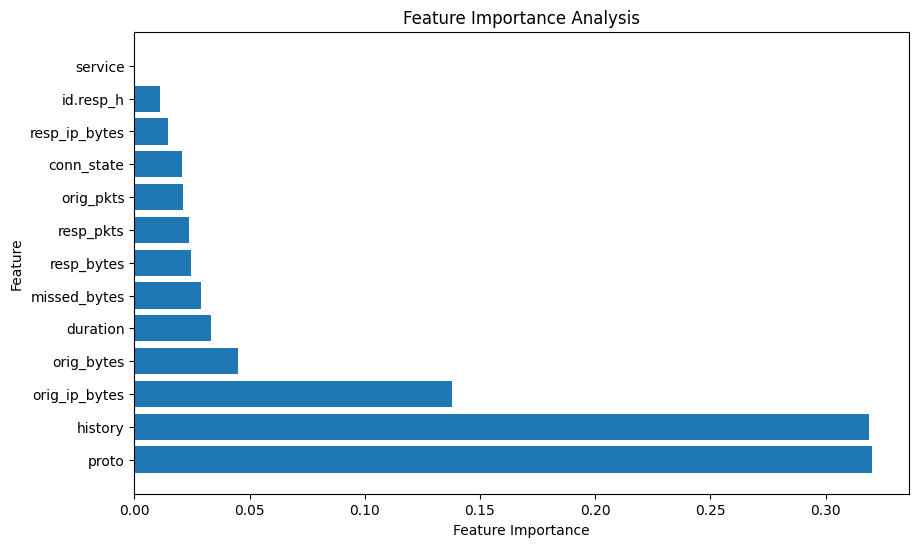

In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df_reduced.drop(columns=['label'])

y = df_reduced['label']


rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

In [12]:
# remove service since it has no importance
df_reduced.drop(columns=['service'], inplace=True)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = df_reduced.drop(columns=['label'])
y = df_reduced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Models
- Isolation Forest
- One-Class SVM (Support Vector Machine)

Another ones
- K-Nearest Neighbors (KNN)
- DBSCAN


## Isolation Forest

In [22]:
# import isolation forest
from sklearn.ensemble import IsolationForest

# train the model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(X)

# add the anomaly score to the dataframe
df_reduced['anomaly_score'] = isolation_forest.decision_function(X)

# map the anomaly score to 0 and 1
df_reduced["prediction"] = df_reduced["anomaly_score"].map(lambda x: 1 if x < -0.2 else 0)

In [23]:
df_reduced

,id.resp_h,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anomaly_score,prediction
0,8,2,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000024,0.000000,0.000000,0,0.051573,0
1,8,2,4.405857e-08,0.005536,0.005536,5,0.000000,2,0.000147,0.000301,0.000281,0.000484,0,-0.071397,0
2,8,2,1.476031e-04,0.004806,0.000061,2,0.000000,1,0.000147,0.000259,0.000000,0.000000,0,0.134708,0
3,8,2,4.373417e-08,0.005536,0.005536,5,0.000000,2,0.000147,0.000301,0.000281,0.000484,0,-0.071397,0
4,8,2,1.485908e-04,0.007178,0.008699,5,0.000000,2,0.000294,0.000493,0.000281,0.000656,0,-0.097116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,16,2,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000056,0.000000,0.000000,0,0.173756,0
3282,45,2,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000056,0.000000,0.000000,0,0.175371,0
3283,29,2,5.868578e-08,0.002981,0.002981,5,0.000000,2,0.000000,0.000056,0.000140,0.000252,0,0.117827,0
3284,38,2,0.000000e+00,0.000000,0.000000,2,0.000000,1,0.000000,0.000056,0.000000,0.000000,0,0.179803,0


In [24]:
print(df_reduced['prediction'].value_counts())
print(df_reduced["label"].value_counts())

prediction
0    3272
1      14
Name: count, dtype: int64
label
0    3272
1      14
Name: count, dtype: int64


In [25]:
# get all rows which were wrong
df_reduced[df_reduced["label"] != df_reduced["prediction"]]

,id.resp_h,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anomaly_score,prediction
20,28,1,0.000092,0.000061,0.000061,2,0.0,3,0.000294,0.000420,0.000000,0.000000,1,-0.086642,0
22,28,1,0.000000,0.000000,0.000000,2,0.0,3,0.000000,0.000000,0.000000,0.000000,1,-0.061307,0
25,28,1,0.000000,0.000000,0.000000,2,0.0,3,0.000000,0.000000,0.000000,0.000000,1,-0.061307,0
74,16,2,0.001534,0.029260,0.029260,5,0.0,2,0.001325,0.002449,0.001403,0.002518,0,-0.218899,1
178,38,2,0.002095,0.023420,0.023420,5,0.0,2,0.001031,0.001917,0.001122,0.002015,0,-0.224422,1
198,37,2,0.002035,0.023420,0.023420,5,0.0,2,0.001031,0.001917,0.001122,0.002015,0,-0.223315,1
228,29,2,0.002185,0.023420,0.023420,5,0.0,2,0.001031,0.001917,0.001122,0.002015,0,-0.221656,1
313,19,2,0.002065,0.023420,0.023420,5,0.0,2,0.001031,0.001917,0.001122,0.002015,0,-0.222209,1
357,45,2,0.002154,0.023420,0.023420,5,0.0,2,0.001031,0.001917,0.001122,0.002015,0,-0.223754,1
1361,21,2,0.002068,0.023420,0.023420,5,0.0,2,0.001031,0.001917,0.001122,0.002015,0,-0.223868,1


In [26]:
# accuracy score (how many did we get right / total cases)
df_reduced[df_reduced['label'] == df_reduced['prediction']].shape[0] / df_reduced.shape[0]

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_reduced['label'], df_reduced['prediction'])
recall = recall_score(df_reduced['label'], df_reduced['prediction'])
f1 = f1_score(df_reduced['label'], df_reduced['prediction'])

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Precision:  0.21428571428571427
Recall:  0.21428571428571427
F1 Score:  0.21428571428571427


## One class SVM